In [1]:
%matplotlib inline
import dpm
from dpm.distributions import *
import torch.distributions as dist
from dpm.train import train
from dpm.visualize import plot_model, plot_models, plot_stats, plot_hist
from dpm.distributions import *
from dpm.criterion import forward_kl, reverse_kl, js_divergence, cross_entropy
from dpm.distributions import MixtureModel, GumbelMixtureModel

In [2]:
q_model = Laplace([0.0], [3.0])
p_model = dist.Laplace(torch.tensor([0.0]), torch.tensor([3.0]))
print(q_model.entropy(), p_model.entropy())

tensor([2.7918], grad_fn=<LogBackward>) tensor([2.7918])


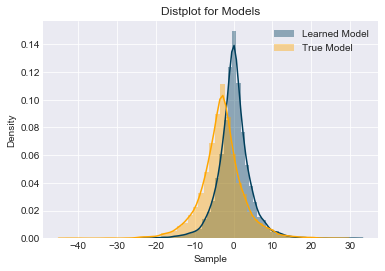

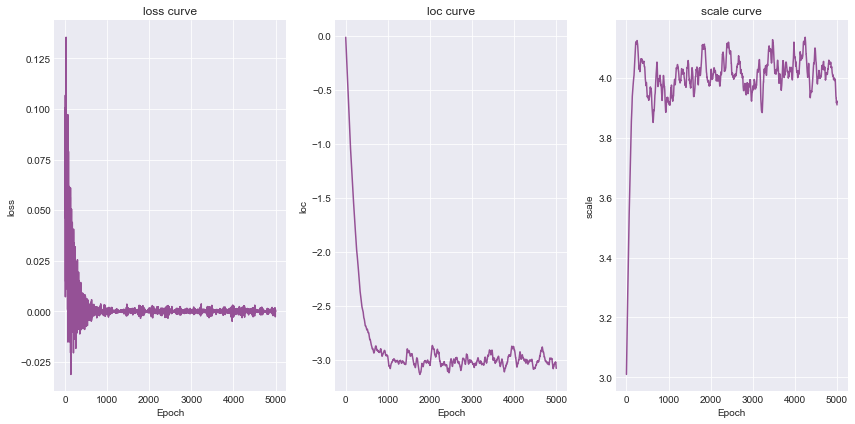

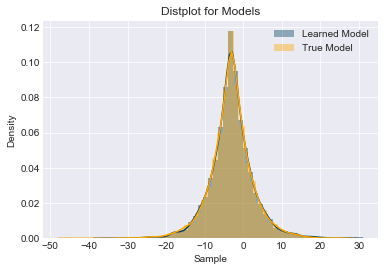

{'loc': -3.0, 'scale': 4.0} {'loc': -3.0798683166503906, 'scale': 3.910095691680908}


In [3]:
q_model = Laplace([0.0], [3.0])
p_model = Laplace([-3.0], [4.0])

plot_models(p_model, q_model)
stats = train(p_model, q_model, js_divergence, 
              track_parameters=True, epochs=5000)
plot_stats(stats)
plot_models(p_model, q_model)
print(p_model.get_parameters(), q_model.get_parameters())

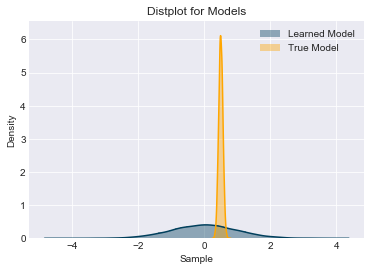

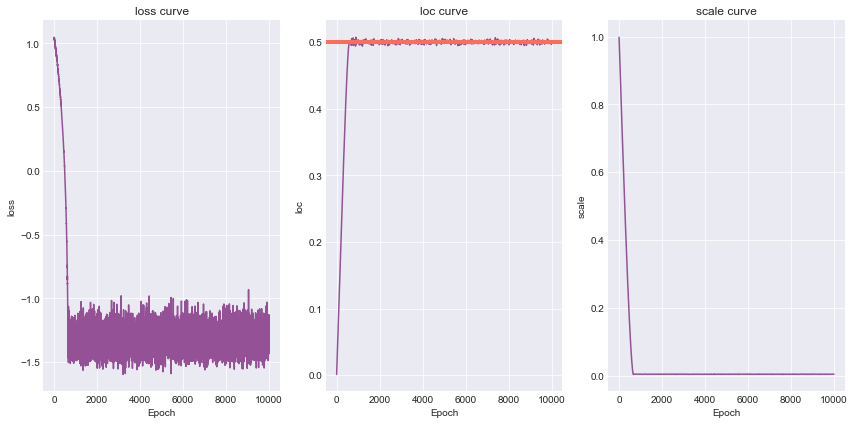

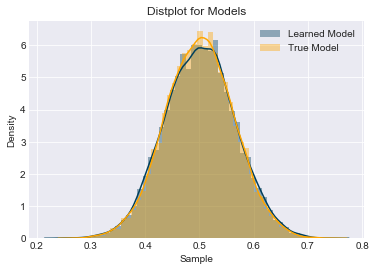

{'alpha': 30.0, 'beta': 30.0} {'loc': 0.500357985496521, 'scale': 0.004191393498331308}


In [6]:
q_model = Normal([0.0],[1.0])
p_model = Beta([30.0], [30.0])

plot_models(p_model, q_model)
stats = train(p_model, q_model, cross_entropy, track_parameters=True, lr=1e-3, epochs=10000)
plot_stats(stats, goals=[0.5])
plot_models(p_model, q_model)
print(p_model.get_parameters(), q_model.get_parameters())

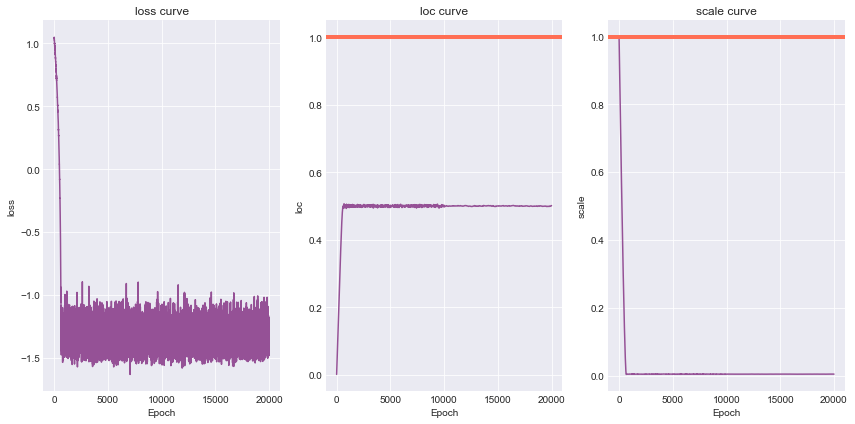

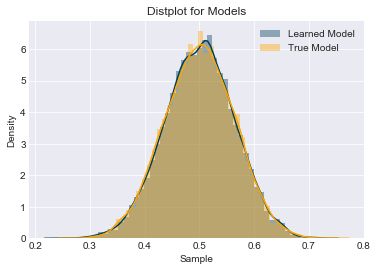

{'alpha': 30.0, 'beta': 30.0} {'loc': 0.5009018778800964, 'scale': 0.004089135676622391}


In [34]:
stats = train(p_model, q_model, cross_entropy, track_parameters=True, lr=1e-4, epochs=10000, stats=stats)
plot_stats(stats, goals=[0.5])
plot_models(p_model, q_model)
print(p_model.get_parameters(), q_model.get_parameters())